<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=3>
    باسمه تعالی
    </font>
    <br><br>
    <font>
    درس یادگیری ماشین
    <br>
        <font size=3>
            مدرس: دکتر سید عباس حسینی
        </font>
    </font>
    <br><br>
    <font>
        <b>فاز اول پروژه</b>
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
    </font>
</div>
</font>
</div>

#Loading train and test data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Binarizer, Normalizer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn import svm
from scipy import sparse
import scipy
from keras.models import Sequential
from keras.layers import Dense
!pip install eli5
import eli5
! pip install fasttext
import nltk
from gensim.models import Word2Vec, FastText

     |████████████████████████████████| 112kB 7.3MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 71kB 4.9MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3098333 sha256=f1bdd2df628bea2263c586f16e04c46d5f3587c36f8761146a17dee5b2468d03
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [3]:
file_name = '/content/drive/MyDrive/ML_Phase2_Datasets/sarcasm_train_set.csv'
train_data = pd.read_csv(file_name, index_col=0)
file_name = '/content/drive/MyDrive/ML_Phase2_Datasets/sarcasm_test_set.csv'
test_data = pd.read_csv(file_name, index_col=0)
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808998 entries, 0 to 808997
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      808998 non-null  int64 
 1   label           808998 non-null  int64 
 2   comment         808960 non-null  object
 3   author          808998 non-null  object
 4   subreddit       808998 non-null  object
 5   score           808998 non-null  int64 
 6   ups             808998 non-null  int64 
 7   downs           808998 non-null  int64 
 8   date            808998 non-null  object
 9   created_utc     808998 non-null  object
 10  parent_comment  808998 non-null  object
dtypes: int64(5), object(6)
memory usage: 67.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201828 entries, 0 to 201827
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      201828 non-null  int64 
 1   label           201828 non-null  int64 
 2   comment         201813 non-null  object
 3   author          201828 non-null  object
 4   subreddit       201828 non-null  object
 5   score           201828 non-null  int64 
 6   ups             201828 non-null  int64 
 7   downs           201828 non-null  int64 
 8   date            201828 non-null  object
 9   created_utc     201828 non-null  object
 10  parent_comment  201828 non-null  object
dtypes: int64(5), object(6)
memory usage: 16.9+ MB


# <p style="font-size:40px; text-align: right;" ><b>EDA</b></p>


<br><p style="font-size:20px; text-align: right;line-height:30px;" >
در ابتدا مقادیر یکتای هرکدام از ستون ها و سپس تعداد سلول های خالی داده مورد نظر را ببرسی میکنیم. همانطور که مشاهده میشود داده در تعدا بسیار کمی از سلول ها خالی است که آن هم فقط مربوط به یک ستون است
 </p>

In [ ]:
for col in train_data.columns:
    print(col, len(train_data[col].unique()))

Unnamed: 0 808998
label 2
comment 772481
author 249291
subreddit 13617
score 1183
ups 1068
downs 2
date 96
created_utc 805032
parent_comment 790289


In [ ]:
train_data.isna().sum()

Unnamed: 0         0
label              0
comment           38
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
test_data.isna().sum()

Unnamed: 0         0
label              0
comment           15
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

<br><p style="font-size:20px; text-align: right;line-height:30px;" >
در ابتدا باید بررسی کنیم ببینیم ایا کلاس های مسئله ballanced هستند یا نه. همانطور که مشاهده میشود به تعداد یکسانی از هر کدام از کلاس ها در داده موجود میباشد
 </p>

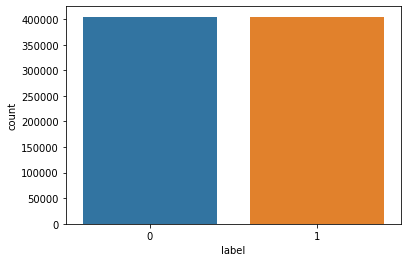

In [ ]:
sns.countplot(x=train_data['label']);

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر ستون downs را مشاهده کنیم. نمودار زیر تعداد نمونه های هرکلاس را با توجه به مقدار downs نشان میدهد. همانطور که مشاهده میشود در نسبت کلاس ها با توجه به هرکدام از مقادیر downs باهم برابر است و مقدار این ستون اطلاعات خاصی را به ما نمیدهد
 </p>

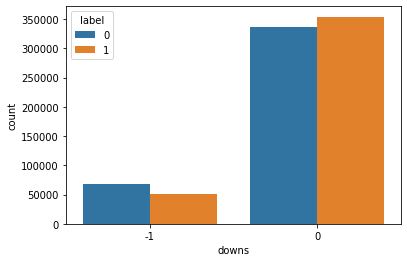

In [ ]:
sns.countplot(data=train_data, x='downs', hue='label');

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
نمودار زیر نیز یک نمودار جعبه ای روی مقادیر ستون score است. همانطور که مشاهده میشود مقادیر این ستون تمرکز و چگالی زیادی نزدیک مقدار 0 دارد
 </p>

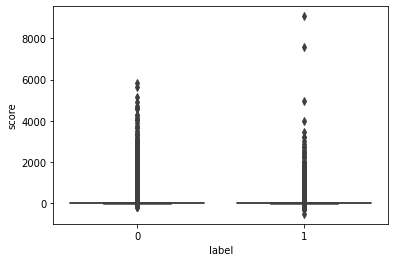

In [ ]:
sns.boxplot(data = train_data, x="label", y="score");

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در نمودار زیر طول کامنت ها را بررسی کرده ایم. البته از لگاریتم طول کامنت ها استفاده شده است. همانطور که مشاهده میشود تمرکز طول کانت ها نیز حول مقدار 3 تا 4 است
 </p>

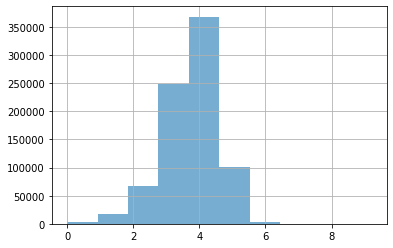

In [ ]:
train_data["comment"].apply(lambda x: np.log(len(str(x)))).hist(alpha = 0.6, bins = 10);

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم ببینم چه کلمه هایی هستند که در کامنت های دارای کنایه زیاد تکرار شده اند. شکل زیر این کلمه ها را به ما نشان میدهد
 </p>

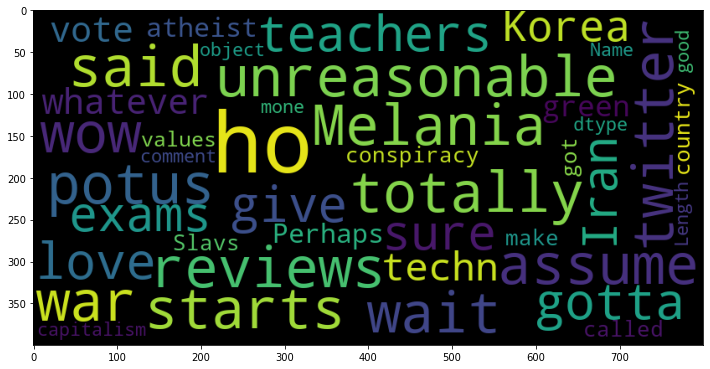

In [ ]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_data.loc[train_data['label'] == 1, 'comment']))
plt.grid(b= False)
plt.imshow(wordcloud);

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم نسبت طول کامنت به کامنت والدش را بررسی کنیم. همانطور که در شکل زیر نشان داده شده است به نظر میرسد طول کامنت با طول کامنت والد خود نسبت معکوس دارد و هرچقدر طول کامنت والد زیاد شده طول کامنت فرزند کاهش میابد و برعکس 
 </p>

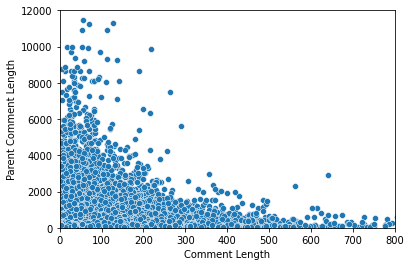

In [ ]:
length_df = pd.DataFrame({"Comment Length": train_data["comment"].apply(lambda x: len(str(x))),
                          "Parent Comment Length": train_data["parent_comment"].apply(lambda x: len(str(x)))})
ax = plt.axes()
sns.scatterplot(data=length_df, x="Comment Length", y="Parent Comment Length")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر موضوعات مختلف کامنت را برروی داشتن کنایه در آن بررسی کنیم. در ابتدا یک دیتافریم میسازیم که هر موضوع و تعداد کامنت هایی کل و کامنت هایی که دارای کنایه هستند و مربوط به آن موضوع اند را دارد
 </p>

In [4]:
subreddit_df = pd.DataFrame({"sarcastic": train_data.loc[train_data["label"]==1, "subreddit"].value_counts(),
                             "total": train_data["subreddit"].value_counts()})
subreddit_df.fillna(0, inplace = True)
subreddit_df["sarcasm_ratio"] = subreddit_df["sarcastic"] / subreddit_df["total"]
mean_subreddit_count = np.mean(subreddit_df["total"])

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
همانطور که مشاهده میشود میانگین کامنت های مرتبط با یک موضوع حدودا 60 است
 </p>

In [ ]:
mean_subreddit_count

59.410883454505395

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال برترین موضوعات براساس نسبت کامنت های کنایه دار را بدست میاوریم. همچنین این شرط را قرار میدهیم که تعداد کامنت های مرتبط با این موضوع باید بیشتر از میانگین باشد
 </p>

In [ ]:
subreddit_df.sort_values(by="sarcasm_ratio", ascending=False).query("total > {}".format(mean_subreddit_count)).head(30)

,sarcastic,total,sarcasm_ratio
creepyPMs,3449.0,4381,0.787263
AnythingGoesNews,63.0,85,0.741176
PussyPass,51.0,69,0.739130
circlebroke,103.0,141,0.730496
libertarianmeme,54.0,74,0.729730
ontario,54.0,74,0.729730
AndroidMasterRace,89.0,122,0.729508
ShitPoliticsSays,160.0,222,0.720721
progun,307.0,432,0.710648
wisconsin,121.0,171,0.707602


<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
قسمت زیر نیز موضوعاتی که کمترین کنایه در آنها یافت میشود را نشان میدهد. همچنین تعداد کامنت های مرتبط با آنها نیز باید بیشتر از حد متوسط باشد
 </p>

In [ ]:
subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {}".format(mean_subreddit_count)).head(30)

,sarcastic,total,sarcasm_ratio
onewordeach,0.0,94,0.000000
AskOuija,0.0,123,0.000000
CatsStandingUp,0.0,79,0.000000
friendsafari,1.0,110,0.009091
Fireteams,16.0,417,0.038369
pokemontrades,10.0,165,0.060606
IASIP,9.0,92,0.097826
RoastMe,54.0,513,0.105263
circlejerk,41.0,339,0.120944
me_irl,72.0,569,0.126538


<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
برای بررسی موثر بودن مقدار score در کنایه دار بودن یک کامنت به این شکل عمل میکنیم که مقادیر score را به چند بازی تقسیم کرده و هر کدام را به یک بازه اختصاص میدهیم. به دلیل متمرکز بودن بخش زیادی از این داده نمیتوان آنها را به تعداد زیادی گروه تقسیم کرد. همانطور که در شکل زیر نمایش داده شده است گروه های مختلف score فرق چندان زیادی در نسبت کامنت های کنایه دار ندارند
 </p>

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


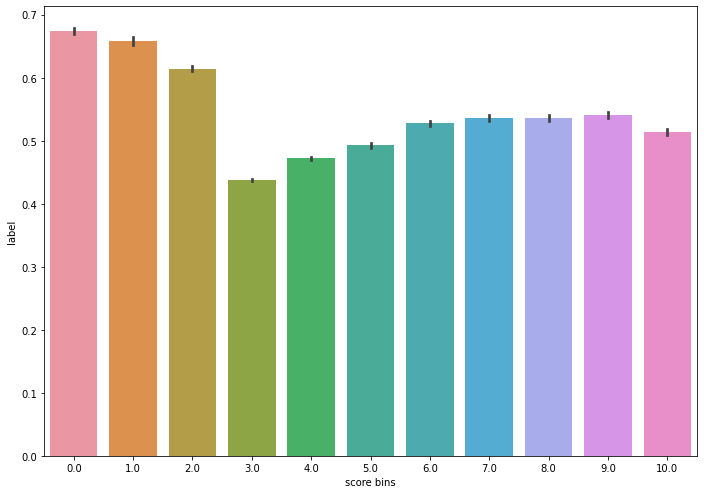

In [ ]:
# kmeans or uniform strategy leads to some groups having a few members

est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
score_df = pd.DataFrame({"label": train_data.label,
                         "score bins": est.fit_transform(np.array(train_data["score"]).reshape(len(train_data["score"]), 1))[:,0]})
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = score_df, x = "score bins", y = "label");

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در قسمت زیر نیز همانکاری که برای score کرده بودیم را برای ستون ups انجام داده ایم که در این قسمت نیز تفاوت چندانی بین گروه های مختلف به نظر نمیرسد
 </p>

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


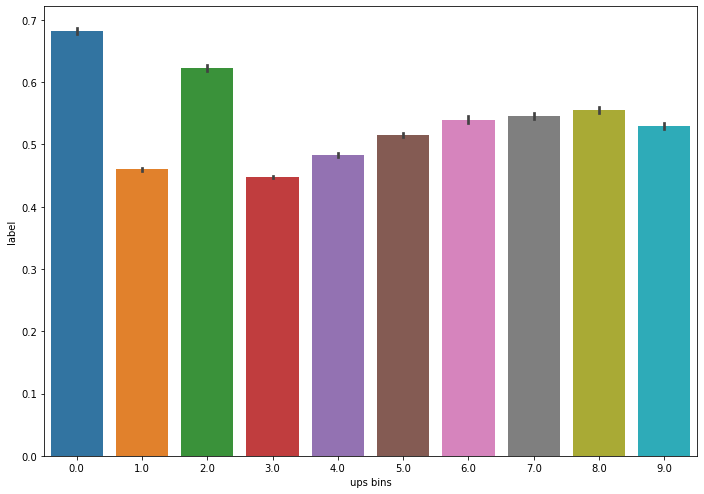

In [ ]:
est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
ups_df = pd.DataFrame({"label": train_data.label,
                         "ups bins": est.fit_transform(np.array(train_data["ups"]).reshape(len(train_data["ups"]), 1))[:,0]})
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = ups_df, x = "ups bins", y = "label");

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال میخواهیم تاثیر تاریخ را روی کنایه دار بودن کامنت بررسی کنیم. به عبارتی میخواهیم بررسی کنیم که ایا روزهای هفته یا ماه یا حتی سال های مختلف روی کنایه دار بودن کامنت ها تاثیر دارد یا خیر. <br>
در ابتدا یک دیتافریم شامل لیبل هر کامنت و روز هفته و ماه و سال آن درست میکنیم
 </p>

In [ ]:
date_df = pd.DataFrame({"label": train_data["label"]})
date_df["day name"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.day_name())
date_df["month name"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.month_name())
date_df["year"] = pd.to_datetime(train_data['created_utc'], format = '%Y-%m-%d %H:%M:%S').apply(lambda x: x.year)

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
شکل زیر تاثیر روزهای هفته را روی کنایه دار بودن کامنت نشان میدهد. همانطور که مشاهده میشود تفاوتی بین روزهای هفته وجود ندارد
 </p>

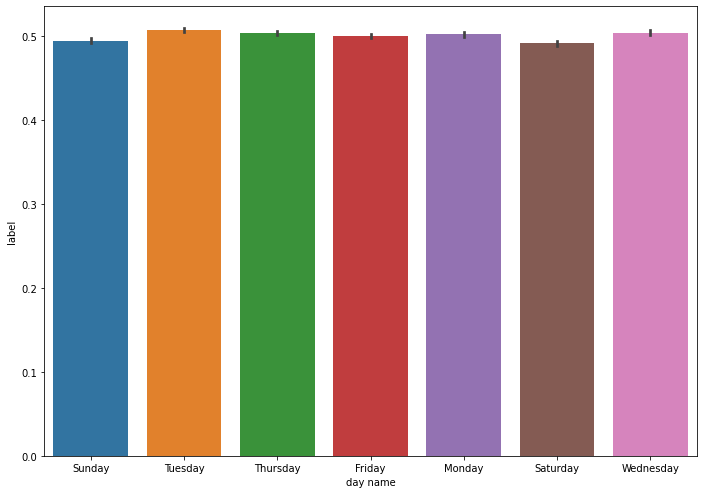

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(data = date_df, x = "day name", y = "label");

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
شکل زیر نیز نسبت کامنت های کنایه دار را در ماه های مختلف نشان میدهد. با وجود اینکه در ماه های انتهایی سال کنایه بیشتری به چشم میخورد اما بازهم تفاوت خیلی کمی بین ماه ها وجود دارد
 </p>

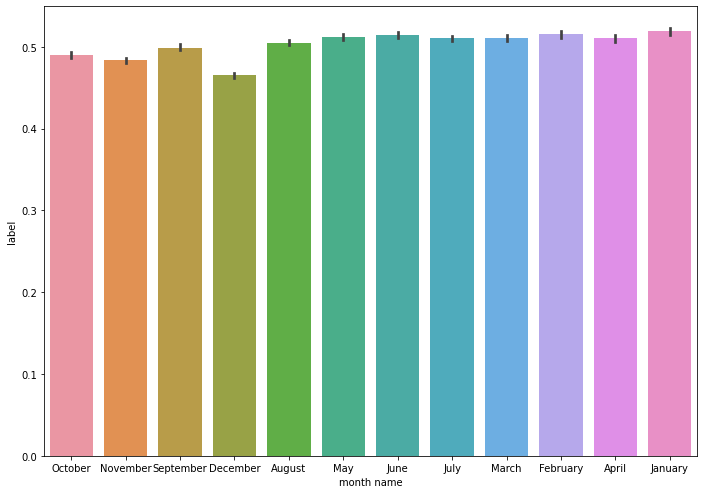

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(ax = ax, data = date_df, x = "month name", y = "label");

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در شکل زیر نسبت کامنت های کنایه دار در سال های مختلف نمایش داده شده است. همانطور که مشاهده میشود به نظر میرسد به گذشت زمان مردم کمتر کامنت کنایه دار میگذارند اما بازهم تفاوتی چندانی بین سال های مختلف به چشم نمیخورد
 </p>

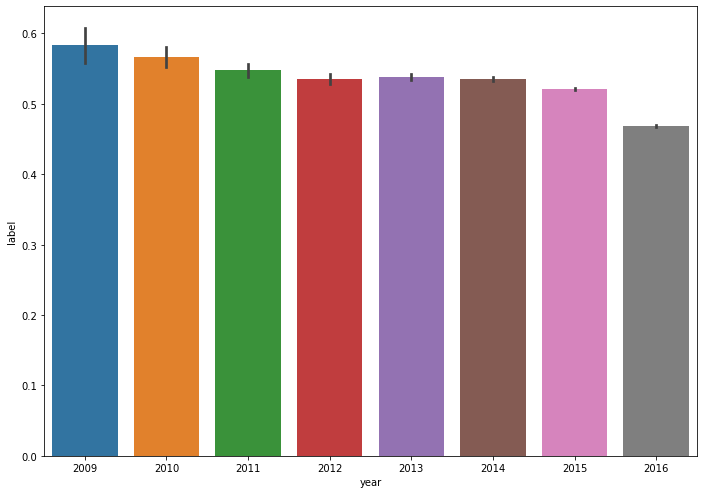

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.barplot(ax = ax, data = date_df, x = "year", y = "label");

# <p style="font-size:100px; text-align: right;" ><b>Feature Engineering</b></p>

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
در ابتدا ستون هایی که نیاز نداریم را پاک میکنیم. از بین ستون های داده فقط ستون لیبل و ستون موضوع را نیاز داشتیم و باقی ستون های تاثیر خاصی در کنایه امیز بودن کامنت نداشتند
 </p>

In [5]:
train_data.drop(columns=["date", "created_utc", "author", "score",	"ups",	"downs"], inplace = True)
test_data.drop(columns=["date", "created_utc", "author", "score",	"ups",	"downs"], inplace = True)

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال ردیف هایی که سلول خالی دارند را حدف میکنیم. تعداد این ردیف های بسیار کم و در حد 40 یا 50 تا است.
 </p>






In [6]:
# only comment columns have na
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

<p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال برای گروه بندی موضوعات روش زیر را بکار میبریم. یک گروه را موضوعاتی که بیشتر از 70 درصد کامنت های آنها کنایه امیز است قرار میدهیم. گروه بعدی بین 65 تا 70. گروه های دیگر را نیز به ترتیب بین 0 تا 10, بین 10 تا 20 و بین 20 تا 30 درصد قرار میدهیم. باقی موضوعات باقی مانده نیز یک گروه جدا میشوند.
 </p>

In [7]:
subred_above_70 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {}".format(mean_subreddit_count, 0.70)).index)
subred_between_65_70 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.65, 0.70)).index)
subred_below_10 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio < {}".format(mean_subreddit_count, 0.10)).index)
subred_between_10_20 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.10, 0.20)).index)
subred_between_20_30 = list(subreddit_df.sort_values(by="sarcasm_ratio", ascending=True).query("total > {} and sarcasm_ratio > {} and sarcasm_ratio <= {}".format(
                                                                                                                                        mean_subreddit_count, 0.20, 0.30)).index)
subred_groups = [subred_below_10, subred_between_10_20, subred_between_20_30, subred_between_65_70, subred_above_70]

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
حال ستون موضوعات داده را بصورت عددی درمیاوریم
 </p>

In [8]:
def set_subred_group(subred):
  for j in range(len(subred_groups)):
    if subred in subred_groups[j]:
      return j + 1
  return 0
train_data["subreddit"] = train_data["subreddit"].apply(set_subred_group)
test_data["subreddit"] = test_data["subreddit"].apply(set_subred_group)

In [ ]:
# STOPWORDS

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
لازم است لیبل ها را بصورت ارایه جدا داشته باشیم. برای مدل های مختلف نیاز به لیبل های مختلف داریم. برای همین یک نمونه از لیبل ها بصورت ارایه تک بعدی و یک نمونه دیگر بصورت one hot درست میکنیم که در train شبکه عصبی ما کاربرد دارد
 </p>

In [9]:
y_train = np.array(train_data["label"])
y_test = np.array(test_data["label"])
ohe = OneHotEncoder()
y_train_one_hot = ohe.fit_transform(y_train.reshape((-1, 1))).toarray()
y_test_one_hot = ohe.fit_transform(y_test.reshape((-1, 1))).toarray()

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
همچنین برای vectorize کردن کامنت ها نیاز داریم آنها را بصورت لیست داشته باشیم که در قسمت زیر این کار را برای داده های ترین و تست انجام داده ایم
 </p>

In [10]:
train_x = list(train_data["comment"])
test_x = list(test_data["comment"])

# comments_parents_together_train_x = [train_data.loc[i, "parent_comment"] + train_data.loc[i, "comment"] for i in range(len(train_data))]
# comments_parents_together_test_x = [test_data.loc[i, "parent_comment"] + test_data.loc[i, "comment"] for i in range(len(test_data))]

In [11]:
nltk.download('punkt')
nltk.download('wordnet')
porterStemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer() 
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''  
def prepare_text(raw_text):
    tokens = nltk.word_tokenize(raw_text)
  
    # remove punctuation, casefolding, stem and then lemmatize
    for i in range(len(tokens)-1,-1, -1):
        if tokens[i] in punc:
            del tokens[i]
        else:
            stemmed_casefolded_token = porterStemmer.stem(tokens[i].casefold())
            tokens[i] = lemmatizer.lemmatize(stemmed_casefolded_token)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
%%time
tokenized_train_x = [prepare_text(x) for x in train_x]
tokenized_test_x = [prepare_text(x) for x in test_x]
# almost 1GB ram

CPU times: user 7min 3s, sys: 2.63 s, total: 7min 5s
Wall time: 7min 6s


# <p style="font-size:40px; text-align: right;" ><b>TF-IDF embeding</b></p>

<br><p style="font-size:20px; text-align: right;line-height:30px;direction:RTL;" >
این ایمبدینگ به این صورت است که ابتدا TF و IDF را برای هر Term مشخص میکند و سپس این مقدار را در هم ضرب میکند. مقدار TF یا همان term friquency تعداد تکرار کلمه را نشان میدهد. مقدار IDF یا همان inverse document friquency نیز لگاریم تعداد کل داکیومنت ها تقسیم بر داکیومنت های حاوی آن ترم است <br>
در 2 قسمت زیر وکتورهای مرتبط با tf-idf کامنت ها را بدست اورده ایم
 </p>

In [ ]:
Tf_Idf_Vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words='english', max_features=500).fit(train_x)
# Tf_Idf_Vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words=None).fit(train_x)

In [ ]:
Tf_Idf_train_x = sparse.hstack([Tf_Idf_Vectorizer.transform(train_x), sparse.csr_matrix(np.array(train_data["subreddit"]).reshape((-1, 1)))])
Tf_Idf_test_x = sparse.hstack([Tf_Idf_Vectorizer.transform(test_x), sparse.csr_matrix(np.array(test_data["subreddit"]).reshape((-1, 1)))]) 

In [ ]:
# Tf_Idf_Vectorizer.get_feature_names()

# <p style="font-size:40px; text-align: right;" ><b>Worc2Vec embedding</b></p>


In [ ]:
%%time
word2vec_model = Word2Vec(tokenized_train_x, min_count=1, size=200)
# almost 300MG ram

CPU times: user 2min 59s, sys: 1.15 s, total: 3min
Wall time: 1min 52s


In [ ]:
def cal_word2vec(tokens_list, word2vec_model):
  result = np.zeros(200)
  tokens_number = 0
  for token in tokens_list:
    # print(token)
    try:
      result += word2vec_model[token]
      tokens_number += 1
    except:
      continue
  return result

In [ ]:
%%time
word2vec_test_x = sparse.csr_matrix(np.vstack([cal_word2vec(comment_tokens, word2vec_model) for comment_tokens in tokenized_test_x]))
word2vec_train_x = sparse.csr_matrix(np.vstack([cal_word2vec(comment_tokens, word2vec_model) for comment_tokens in tokenized_train_x]))
# almost 200MG ram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


CPU times: user 1min 27s, sys: 10.5 s, total: 1min 38s
Wall time: 1min 36s


# <p style="font-size:40px; text-align: right;" ><b>FastText embedding</b></p>


In [13]:
%%time
FastText_model = FastText(vector_size=4, window=3, min_count=1)  # instantiate
FastText_model.build_vocab(sentences=tokenized_train_x)

TypeError: ignored

In [ ]:
%%time
FastText_model.train(sentences=tokenized_train_x, total_examples=len(tokenized_train_x), epochs=10)  # train

# <p style="font-size:100px; text-align: right;" ><b>Testing Models</b></p>


In [ ]:
def classification_rep(y_pred, y_act):
    confusion_matrix = pd.crosstab(np.array(y_pred), np.array(y_act), rownames=['Actual'], colnames=['Predicted'])
    print(classification_report(y_act, y_pred, target_names=["class 0", "class 1"]))
    sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

# <p style="font-size:40px; text-align: right;" ><b>Testing TF-IDF</b></p>


<p style="font-size:40px; text-align: right;" ><b>Loggistic regression</b></p>

In [ ]:
%%time
LR_clf_Tf_idf = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, n_jobs=-1)
LR_clf_Tf_idf.fit(Tf_Idf_train_x, y_train)

CPU times: user 242 ms, sys: 223 ms, total: 465 ms
Wall time: 15.6 s


In [ ]:
Tf_Idf_LR_clf_train_pred = LR_clf_Tf_idf.predict(Tf_Idf_train_x)
Tf_Idf_LR_clf_test_pred = LR_clf_Tf_idf.predict(Tf_Idf_test_x)
# with above cell almost 100MG

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    404225
     class 1       0.66      0.53      0.59    404735

    accuracy                           0.63    808960
   macro avg       0.64      0.63      0.63    808960
weighted avg       0.64      0.63      0.63    808960



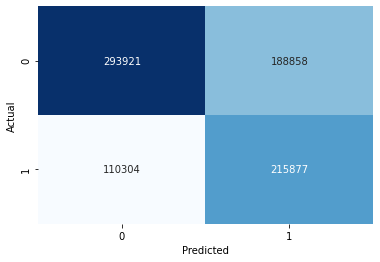

In [ ]:
print("logistic regression report on train data")
classification_rep(Tf_Idf_LR_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    101180
     class 1       0.66      0.53      0.59    100633

    accuracy                           0.63    201813
   macro avg       0.63      0.63      0.63    201813
weighted avg       0.63      0.63      0.63    201813



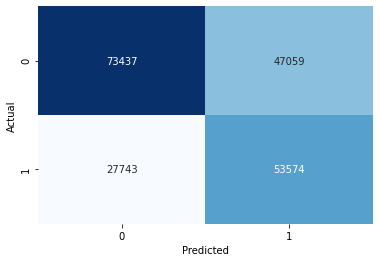

In [ ]:
print("logistic regression report on test data")
classification_rep(Tf_Idf_LR_clf_test_pred, y_test)

In [ ]:
eli5.show_weights(LR_clf_Tf_idf, vec=Tf_Idf_Vectorizer, top=100, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+3.592,obviously
+3.314,forgot
+3.223,totally
+3.179,clearly
+3.177,duh
+3.169,dropped
+3.064,dare
+2.588,yeah
+2.575,racist
+2.433,fault


<p style="font-size:40px; text-align: right;" ><b>Guassian Naive Bayes</b></p>


In [ ]:
%%time
GaussianNB_clf_Tf_Idf = GaussianNB()
GaussianNB_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train)

CPU times: user 6.89 s, sys: 5.04 s, total: 11.9 s
Wall time: 11.9 s


In [ ]:
Tf_Idf_GaussianNB_clf_train_pred = GaussianNB_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_GaussianNB_clf_test_pred = GaussianNB_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())
# with above cell almost 100MG

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.59      0.74      0.66    404225
     class 1       0.65      0.49      0.56    404735

    accuracy                           0.61    808960
   macro avg       0.62      0.61      0.61    808960
weighted avg       0.62      0.61      0.61    808960



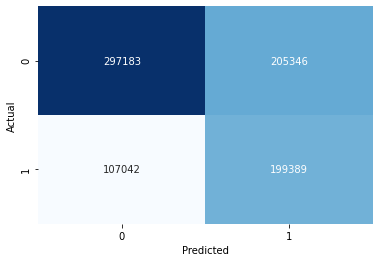

In [ ]:
print("logistic regression report on train data")
classification_rep(Tf_Idf_GaussianNB_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.59      0.73      0.66    101180
     class 1       0.65      0.49      0.56    100633

    accuracy                           0.61    201813
   macro avg       0.62      0.61      0.61    201813
weighted avg       0.62      0.61      0.61    201813



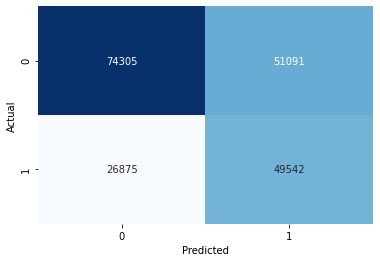

In [ ]:
print("logistic regression report on test data")
classification_rep(Tf_Idf_GaussianNB_clf_test_pred, y_test)

<p style="font-size:40px; text-align: right;" ><b>SVM</b></p>

In [ ]:
%%time
SVM_clf_Tf_Idf = svm.LinearSVC(random_state=0, tol=1e-5)
# rows = np.random.choice(list(range(len(train_data))), size=100000, replace=False)
SVM_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train)

CPU times: user 2min 56s, sys: 0 ns, total: 2min 56s
Wall time: 2min 56s


In [ ]:
Tf_Idf_SVM_clf_train_pred = SVM_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_SVM_clf_test_pred = SVM_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())

SVM report on train data
              precision    recall  f1-score   support

     class 0       0.61      0.73      0.66    404225
     class 1       0.66      0.53      0.59    404735

    accuracy                           0.63    808960
   macro avg       0.63      0.63      0.63    808960
weighted avg       0.64      0.63      0.63    808960



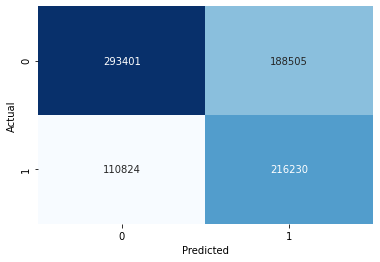

In [ ]:
print("SVM report on train data")
classification_rep(Tf_Idf_SVM_clf_train_pred, y_train)

SVM report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.72      0.66    101180
     class 1       0.66      0.53      0.59    100633

    accuracy                           0.63    201813
   macro avg       0.63      0.63      0.63    201813
weighted avg       0.63      0.63      0.63    201813



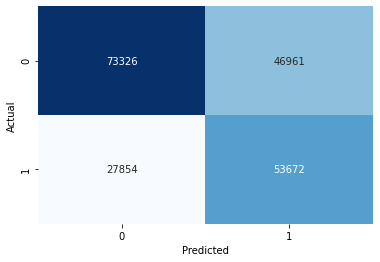

In [ ]:
print("SVM report on test data")
classification_rep(Tf_Idf_SVM_clf_test_pred, y_test)

<p style="font-size:40px; text-align: right;" ><b>Nueral Network</b></p>


In [ ]:
%%time
NN_clf_Tf_Idf = Sequential()
NN_clf_Tf_Idf.add(Dense(50, input_dim=Tf_Idf_train_x.shape[1], activation='relu'))
NN_clf_Tf_Idf.add(Dense(12, activation='relu'))
NN_clf_Tf_Idf.add(Dense(2, activation='softmax'))

CPU times: user 55.5 ms, sys: 18.1 ms, total: 73.6 ms
Wall time: 374 ms


In [ ]:
NN_clf_Tf_Idf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
# using validation data with it uses lots of ram leading to crashing
# NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, validation_data = (Tf_Idf_train_x.toarray(),y_test_one_hot), epochs=5, batch_size=64)
NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, epochs=30, batch_size=64)

Epoch 1/30
12640/12640 [==============================] - 36s 2ms/step - loss: 0.6418 - accuracy: 0.6237
Epoch 2/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6263 - accuracy: 0.6391
Epoch 3/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6222 - accuracy: 0.6426
Epoch 4/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6184 - accuracy: 0.6462
Epoch 5/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6152 - accuracy: 0.6489
Epoch 6/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6127 - accuracy: 0.6510
Epoch 7/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6110 - accuracy: 0.6519
Epoch 8/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6090 - accuracy: 0.6534
Epoch 9/30
12640/12640 [==============================] - 22s 2ms/step - loss: 0.6072 - accuracy: 0.6553
Epoch 10/30
12640/12640 [==============================

In [ ]:
Tf_Idf_NN_clf_train_pred = NN_clf_Tf_Idf.predict(Tf_Idf_train_x.toarray())
Tf_Idf_NN_clf_train_pred = np.array([np.argmax(Tf_Idf_NN_clf_train_pred[i]) for i in range(len(Tf_Idf_NN_clf_train_pred))])

Tf_Idf_NN_clf_test_pred = NN_clf_Tf_Idf.predict(Tf_Idf_test_x.toarray())
Tf_Idf_NN_clf_test_pred = np.array([np.argmax(Tf_Idf_NN_clf_test_pred[i]) for i in range(len(Tf_Idf_NN_clf_test_pred))])

NN report on train data
              precision    recall  f1-score   support

     class 0       0.63      0.79      0.70    404225
     class 1       0.72      0.54      0.62    404735

    accuracy                           0.67    808960
   macro avg       0.68      0.67      0.66    808960
weighted avg       0.68      0.67      0.66    808960



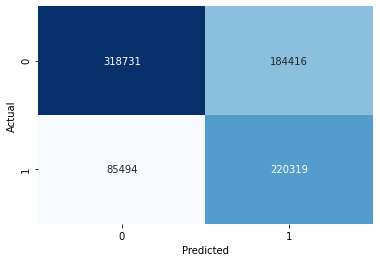

In [ ]:
print("NN report on train data")
classification_rep(Tf_Idf_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.61      0.76      0.68    101180
     class 1       0.68      0.51      0.59    100633

    accuracy                           0.64    201813
   macro avg       0.64      0.64      0.63    201813
weighted avg       0.64      0.64      0.63    201813



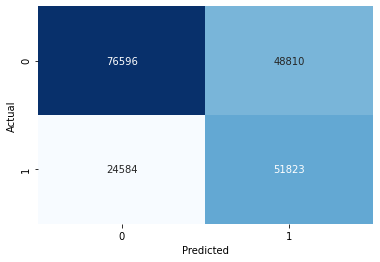

In [ ]:
print("NN report on test data")
classification_rep(Tf_Idf_NN_clf_test_pred, y_test)

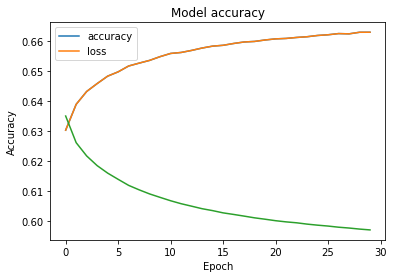

In [ ]:
plt.plot(NN_clf_Tf_Idf_history.history['accuracy'])
plt.plot(NN_clf_Tf_Idf_history.history['accuracy'])
plt.plot(NN_clf_Tf_Idf_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# <p style="font-size:40px; text-align: right;" ><b>Testing Word2Vec </b></p>


<p style="font-size:40px; text-align: right;" ><b>Loggistic regression</b></p>


In [ ]:
%%time
LR_clf_word2vec = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, n_jobs=-1)
LR_clf_word2vec.fit(word2vec_train_x, y_train)

CPU times: user 2.43 s, sys: 1.46 s, total: 3.88 s
Wall time: 5min 53s


In [ ]:
word2vec_LR_clf_train_pred = LR_clf_word2vec.predict(word2vec_train_x)
word2vec_LR_clf_test_pred = LR_clf_word2vec.predict(word2vec_test_x)

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.64      0.71      0.67    404225
     class 1       0.68      0.61      0.64    404735

    accuracy                           0.66    808960
   macro avg       0.66      0.66      0.66    808960
weighted avg       0.66      0.66      0.66    808960



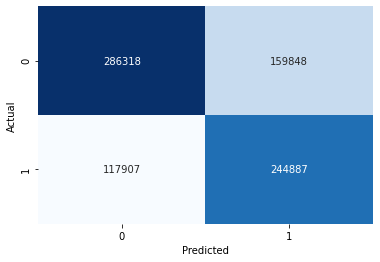

In [ ]:
print("logistic regression report on train data")
classification_rep(word2vec_LR_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.64      0.71      0.67    101180
     class 1       0.67      0.60      0.64    100633

    accuracy                           0.66    201813
   macro avg       0.66      0.66      0.65    201813
weighted avg       0.66      0.66      0.65    201813



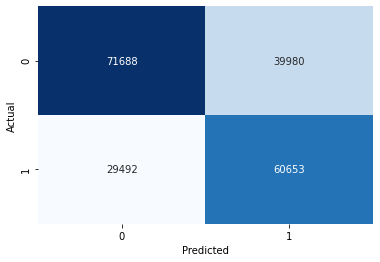

In [ ]:
print("logistic regression report on test data")
classification_rep(word2vec_LR_clf_test_pred, y_test)

<p style="font-size:40px; text-align: right;" ><b>Guassian Naive Bayes</b></p>


In [ ]:
GaussianNB_clf_word2vec = GaussianNB()
GaussianNB_clf_word2vec.fit(word2vec_train_x.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
word2vec_GaussianNB_clf_train_pred = GaussianNB_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_GaussianNB_clf_test_pred = GaussianNB_clf_word2vec.predict(word2vec_test_x.toarray())

logistic regression report on train data
              precision    recall  f1-score   support

     class 0       0.57      0.14      0.22    404225
     class 1       0.51      0.89      0.65    404735

    accuracy                           0.52    808960
   macro avg       0.54      0.52      0.44    808960
weighted avg       0.54      0.52      0.44    808960



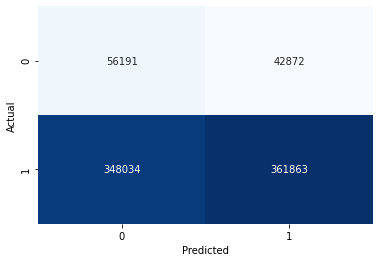

In [ ]:
print("logistic regression report on train data")
classification_rep(word2vec_GaussianNB_clf_train_pred, y_train)

logistic regression report on test data
              precision    recall  f1-score   support

     class 0       0.57      0.14      0.22    101180
     class 1       0.51      0.90      0.65    100633

    accuracy                           0.51    201813
   macro avg       0.54      0.52      0.43    201813
weighted avg       0.54      0.51      0.43    201813



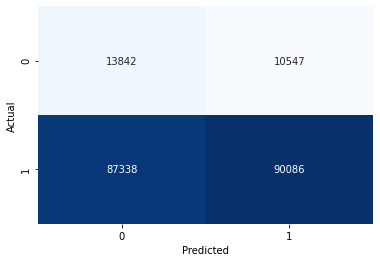

In [ ]:
print("logistic regression report on test data")
classification_rep(word2vec_GaussianNB_clf_test_pred, y_test)

<p style="font-size:40px; text-align: right;" ><b>SVM</b></p>

In [ ]:
%%time
SVM_clf_word2vec = svm.LinearSVC(random_state=0, tol=1e-5)
# rows = np.random.choice(list(range(len(train_data))), size=100000, replace=False)
SVM_clf_word2vec.fit(word2vec_train_x.toarray(), y_train)

CPU times: user 17min 58s, sys: 1.05 s, total: 17min 59s
Wall time: 17min 54s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
word2vec_SVM_clf_train_pred = SVM_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_SVM_clf_test_pred = SVM_clf_word2vec.predict(word2vec_test_x.toarray())

SVM report on train data
              precision    recall  f1-score   support

     class 0       0.71      0.18      0.28    404225
     class 1       0.53      0.93      0.67    404735

    accuracy                           0.55    808960
   macro avg       0.62      0.55      0.48    808960
weighted avg       0.62      0.55      0.48    808960



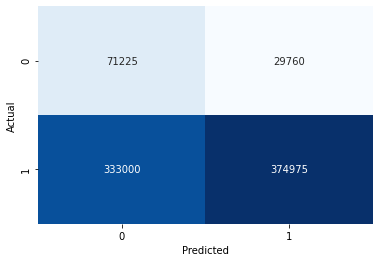

In [ ]:
print("SVM report on train data")
classification_rep(word2vec_SVM_clf_train_pred, y_train)

SVM report on test data
              precision    recall  f1-score   support

     class 0       0.70      0.18      0.28    101180
     class 1       0.53      0.93      0.67    100633

    accuracy                           0.55    201813
   macro avg       0.62      0.55      0.48    201813
weighted avg       0.62      0.55      0.48    201813



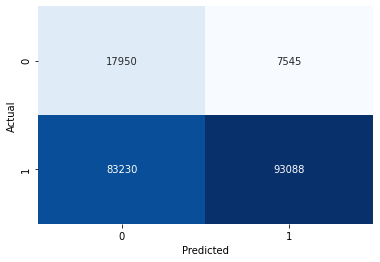

In [ ]:
print("SVM report on test data")
classification_rep(word2vec_SVM_clf_test_pred, y_test)

<p style="font-size:40px; text-align: right;" ><b>Nueral Network</b></p>


In [ ]:
NN_clf_word2vec = Sequential()
NN_clf_word2vec.add(Dense(50, input_dim=word2vec_train_x.shape[1], activation='relu'))
NN_clf_word2vec.add(Dense(12, activation='relu'))
NN_clf_word2vec.add(Dense(2, activation='softmax'))

In [ ]:
NN_clf_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
# using validation data with it uses lots of ram leading to crashing
# NN_clf_Tf_Idf_history = NN_clf_Tf_Idf.fit(Tf_Idf_train_x.toarray(), y_train_one_hot, validation_data = (Tf_Idf_train_x.toarray(),y_test_one_hot), epochs=5, batch_size=64)
NN_clf_word2vec_history = NN_clf_word2vec.fit(word2vec_train_x.toarray(), y_train_one_hot, epochs=30, batch_size=64)

Epoch 1/30
12640/12640 [==============================] - 21s 2ms/step - loss: 0.6300 - accuracy: 0.6407
Epoch 2/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5877 - accuracy: 0.6823
Epoch 3/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5800 - accuracy: 0.6892
Epoch 4/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5744 - accuracy: 0.6941
Epoch 5/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5703 - accuracy: 0.6970
Epoch 6/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5688 - accuracy: 0.6999
Epoch 7/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5672 - accuracy: 0.6998
Epoch 8/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5658 - accuracy: 0.7016
Epoch 9/30
12640/12640 [==============================] - 20s 2ms/step - loss: 0.5649 - accuracy: 0.7025
Epoch 10/30
12640/12640 [==============================

In [ ]:
word2vec_NN_clf_train_pred = NN_clf_word2vec.predict(word2vec_train_x.toarray())
word2vec_NN_clf_train_pred = np.array([np.argmax(word2vec_NN_clf_train_pred[i]) for i in range(len(word2vec_NN_clf_train_pred))])

word2vec_NN_clf_test_pred = NN_clf_word2vec.predict(word2vec_test_x.toarray())
word2vec_NN_clf_test_pred = np.array([np.argmax(word2vec_NN_clf_test_pred[i]) for i in range(len(word2vec_NN_clf_test_pred))])

NN report on train data
              precision    recall  f1-score   support

     class 0       0.71      0.72      0.71    404225
     class 1       0.72      0.70      0.71    404735

    accuracy                           0.71    808960
   macro avg       0.71      0.71      0.71    808960
weighted avg       0.71      0.71      0.71    808960



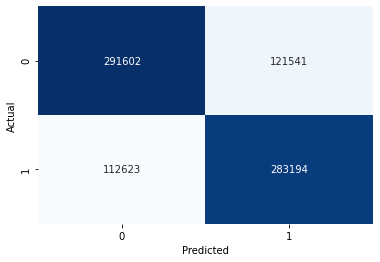

In [ ]:
print("NN report on train data")
classification_rep(word2vec_NN_clf_train_pred, y_train)

NN report on test data
              precision    recall  f1-score   support

     class 0       0.70      0.71      0.70    101180
     class 1       0.70      0.69      0.70    100633

    accuracy                           0.70    201813
   macro avg       0.70      0.70      0.70    201813
weighted avg       0.70      0.70      0.70    201813



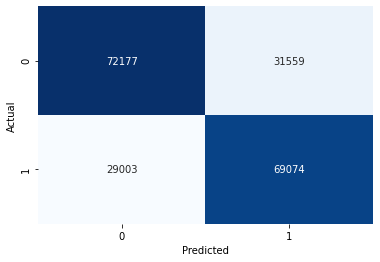

In [ ]:
print("NN report on test data")
classification_rep(word2vec_NN_clf_test_pred, y_test)

In [ ]:
word2vec_NN_clf_test_pred

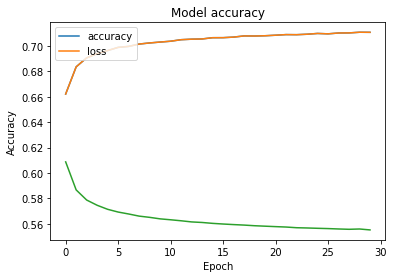

In [ ]:
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['accuracy'])
plt.plot(NN_clf_word2vec_history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# <p style="font-size:40px; text-align: right;" ><b>Testing FastText</b></p>
